# Is Economic Development linked to Happiness?

In [1]:
import pandas as pd
import requests

happiness_raw = pd.read_csv("https://ourworldindata.org/grapher/share-of-people-who-say-they-are-happy.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})

happiness = happiness_raw.drop(columns='821407-annotations')

happiness

,Entity,Code,Year,happy
0,Albania,ALB,1998,33.43343
1,Albania,ALB,2004,58.80000
2,Albania,ALB,2010,66.85212
3,Albania,ALB,2022,73.92710
4,Algeria,DZA,2004,80.73323
...,...,...,...,...
418,Yemen,YEM,2014,72.10000
419,Zambia,ZMB,2010,51.98119
420,Zimbabwe,ZWE,2004,55.25476
421,Zimbabwe,ZWE,2014,78.82929


In [2]:
onlyone = happiness["Entity"].value_counts()

country_onlyone = onlyone[onlyone == 1].index.tolist()

happiness_filtered = happiness[~happiness['Entity'].isin(country_onlyone)]

happiness_filtered

,Entity,Code,Year,happy
0,Albania,ALB,1998,33.43343
1,Albania,ALB,2004,58.80000
2,Albania,ALB,2010,66.85212
3,Albania,ALB,2022,73.92710
4,Algeria,DZA,2004,80.73323
...,...,...,...,...
416,Vietnam,VNM,2010,91.50501
417,Vietnam,VNM,2022,97.33334
420,Zimbabwe,ZWE,2004,55.25476
421,Zimbabwe,ZWE,2014,78.82929


In [57]:
gdppercap_raw = pd.read_excel("./data/API_NY.GDP.PCAP.PP.CD_DS2_en_excel_v2_3376.xls", skiprows=3)

gdppercap_raw

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Aruba,ABW,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,35972.866445,36117.508211,37524.928478,39287.019517,39110.276190,28976.463550,35696.309372,41649.450792,44967.344513,NaN
1,Africa Eastern and Southern,AFE,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3456.365448,3551.069323,3703.886605,3648.310911,3742.848955,3629.508004,3907.951637,4229.682100,4374.229532,NaN
2,Afghanistan,AFG,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2284.075848,2213.181441,2335.795862,2432.276701,2583.485332,2561.981761,2144.166570,2122.995815,2211.280635,NaN
3,Africa Western and Central,AFW,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4052.733797,3996.864267,4063.185050,4198.081042,4454.156038,4441.937338,4698.926894,5107.272939,5343.468529,NaN
4,Angola,AGO,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7119.726443,6843.735897,6992.728834,7347.799936,7528.382418,6450.749946,7408.126591,7924.888806,8040.702450,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8714.919664,9157.046307,9380.940073,10018.738708,10861.053175,10532.499586,12362.414097,13950.896732,15141.245733,NaN
262,"Yemen, Rep.",YEM,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,13397.523481,13519.323510,13738.438585,13347.363483,13361.485129,12671.086244,13711.293573,14759.435072,15194.199176,NaN
264,Zambia,ZMB,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3337.473069,3313.351216,3391.627685,3442.273072,3361.397503,3157.300093,3503.034914,3840.724505,4076.995087,NaN


In [4]:
#gdppercap = pd.read_excel('./data/API_NY.GDP.PCAP.CD_DS2_en_excel_v2_3031.xls', skiprows=3)
#gdppercap[['Country Name', '2004']]

gdppercap_raw.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2020              float64
2021              float64
2022              float64
2023              float64
2024              float64
Length: 69, dtype: object

In [58]:
#Version World Bank

years_drop = [str(year) for year in range(1960, 1992)] + ['2023', '2024']
columns_drop = ['Indicator Name', 'Indicator Code']

gdppercap_dropped = (
    gdppercap_raw
    .drop(columns=columns_drop)
    .drop(columns=years_drop)
)
gdppercap_dropped
#years_drop

,Country Name,Country Code,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,23889.045017,24575.660660,25791.043178,26254.742803,26004.495628,27240.802789,27412.755194,27765.653257,...,35901.653313,35657.287197,35972.866445,36117.508211,37524.928478,39287.019517,39110.276190,28976.463550,35696.309372,41649.450792
1,Africa Eastern and Southern,AFE,1775.857707,1766.044942,1788.169958,1858.435848,1944.803372,2011.694272,2019.400066,2052.056690,...,3290.844300,3426.575818,3456.365448,3551.069323,3703.886605,3648.310911,3742.848955,3629.508004,3907.951637,4229.682100
2,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2133.241271,2224.490748,2284.075848,2213.181441,2335.795862,2432.276701,2583.485332,2561.981761,2144.166570,2122.995815
3,Africa Western and Central,AFW,1791.207291,1764.645159,1753.347098,1778.288639,1844.818905,1908.391054,1946.771876,1953.486429,...,3899.645897,4103.765604,4052.733797,3996.864267,4063.185050,4198.081042,4454.156038,4441.937338,4698.926894,5107.272939
4,Angola,AGO,3143.440610,2369.241832,2374.020821,2695.805985,3013.332813,3178.494802,3254.244475,3262.975529,...,7561.039205,7990.274457,7119.726443,6843.735897,6992.728834,7347.799936,7528.382418,6450.749946,7408.126591,7924.888806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8090.759393,8200.474205,8714.919664,9157.046307,9380.940073,10018.738708,10861.053175,10532.499586,12362.414097,13950.896732
262,"Yemen, Rep.",YEM,1963.405279,2013.231591,2114.911294,2201.129354,2267.679126,2351.297999,2442.374845,2491.648951,...,3164.321542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,6275.013265,6374.779125,6611.288645,6875.188386,7208.006032,7433.357859,7463.444552,7666.716162,...,13369.438204,13358.941719,13397.523481,13519.323510,13738.438585,13347.363483,13361.485129,12671.086244,13711.293573,14759.435072
264,Zambia,ZMB,1505.026479,1606.669437,1464.056117,1501.391062,1584.581663,1631.173138,1600.628252,1653.836495,...,3477.281788,3441.314976,3337.473069,3313.351216,3391.627685,3442.273072,3361.397503,3157.300093,3503.034914,3840.724505


In [11]:
gdppercap_filtered = (
    gdppercap_dropped
        .melt(id_vars=['Country Name', 'Country Code'], 
        var_name='Year', 
        value_name='GDPpercap')
)

gdppercap_filtered['Year'] = gdppercap_filtered['Year'].astype(int)

gdppercap_filtered

,Country Name,Country Code,Year,GDPpercap
0,Aruba,ABW,1992,23889.045017
1,Africa Eastern and Southern,AFE,1992,1775.857707
2,Afghanistan,AFG,1992,NaN
3,Africa Western and Central,AFW,1992,1791.207291
4,Angola,AGO,1992,3143.440610
...,...,...,...,...
8241,Kosovo,XKX,2022,13950.896732
8242,"Yemen, Rep.",YEM,2022,NaN
8243,South Africa,ZAF,2022,14759.435072
8244,Zambia,ZMB,2022,3840.724505


In [10]:
gdppercap_filtered.count()

Country Name    8246
Country Code    8246
Year            8246
GDPpercap       7557
dtype: int64

In [12]:
gdppercap_without_null = (
    gdppercap_filtered
    .dropna(subset=['GDPpercap'])
)

gdppercap_without_null

,Country Name,Country Code,Year,GDPpercap
0,Aruba,ABW,1992,23889.045017
1,Africa Eastern and Southern,AFE,1992,1775.857707
3,Africa Western and Central,AFW,1992,1791.207291
4,Angola,AGO,1992,3143.440610
5,Albania,ALB,1992,1823.142191
...,...,...,...,...
8240,Samoa,WSM,2022,6260.402383
8241,Kosovo,XKX,2022,13950.896732
8243,South Africa,ZAF,2022,14759.435072
8244,Zambia,ZMB,2022,3840.724505


In [13]:
gdppercap_vs_happiness_merged = (
    happiness_filtered.merge(gdppercap_without_null,
                             how='inner',
                             left_on=['Code', 'Year'],
                             right_on=['Country Code', 'Year']
                    )
)

gdppercap_vs_happiness_renamed = (
    gdppercap_vs_happiness_merged
    .drop(columns={'Country Name', 'Country Code'})
    .rename(columns={'Entity': 'Country Name',
                    'Code': 'Country Code',
                    'GDP per capita': 'GDP per capita (international-$)',
                    'happy': 'Happiness'})
    .sort_values(by='Year')
)

gdppercap_vs_happiness_renamed

,Country Name,Country Code,Year,Happiness,GDPpercap
32,Belarus,BLR,1993,43.84236,4640.856639
45,Brazil,BRA,1993,75.47923,7259.988857
333,Turkey,TUR,1993,81.06796,9748.075095
38,Belgium,BEL,1993,89.69501,20459.189148
316,Sweden,SWE,1993,95.41547,20724.556173
...,...,...,...,...,...
21,Australia,AUS,2022,89.58137,65871.771516
362,Vietnam,VNM,2022,97.33334,13852.116360
7,Andorra,AND,2022,95.01992,68470.075948
365,Zimbabwe,ZWE,2022,51.93416,3560.043273


In [14]:
gdppercap_vs_happiness_renamed.dtypes

Country Name     object
Country Code     object
Year              int64
Happiness       float64
GDPpercap       float64
dtype: object

In [15]:
kept_years = {1993, 1998, 2004, 2010, 2014, 2022}

# Filtrer les lignes correspondant à ces années
gdppercap_vs_happiness = gdppercap_vs_happiness_renamed[gdppercap_vs_happiness_renamed['Year'].isin(kept_years)]

# Trouver les pays qui ont exactement toutes les années requises
complete_countries = (
    gdppercap_vs_happiness.groupby('Country Name')['Year']
    .apply(lambda x: kept_years.issubset(set(x)))
)

# Extraire la liste des pays valides
list_countries = complete_countries[complete_countries].index.tolist()

gdppercap_vs_happiness_final = gdppercap_vs_happiness_renamed[gdppercap_vs_happiness_renamed['Country Name'].isin(list_countries)]

# Affichage
gdppercap_vs_happiness_final

,Country Name,Country Code,Year,Happiness,GDPpercap
32,Belarus,BLR,1993,43.84236,4640.856639
333,Turkey,TUR,1993,81.06796,9748.075095
316,Sweden,SWE,1993,95.41547,20724.556173
59,Chile,CHL,1993,71.86667,5982.351655
65,China,CHN,1993,66.60000,1454.624662
...,...,...,...,...,...
315,Spain,ESP,2022,88.79475,50496.601755
321,Sweden,SWE,2022,93.77649,66375.616456
70,China,CHN,2022,88.94933,22509.636351
338,Turkey,TUR,2022,85.01035,39101.074810


In [16]:
len(list_countries)

17

In [37]:
gdppercap_vs_happiness_final["GDPpercap"].max()

np.float64(78035.17536042118)

In [60]:
gdppercap_vs_happiness_corr = (
    gdppercap_vs_happiness_final[['Happiness', 'GDPpercap']]
        .rename(columns={'Happiness': 'Happy population in %',
                'GDPpercap' : 'GDP per capita in int-$'})
        .corr()
)

<Axes: >

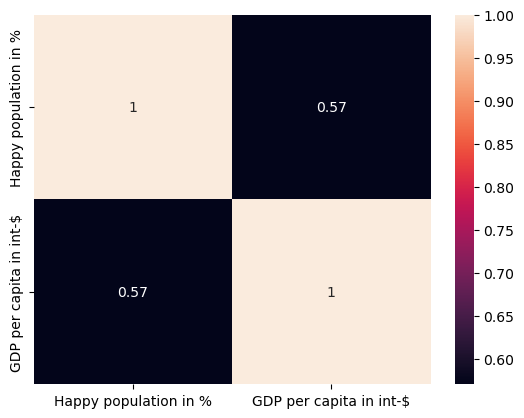

In [34]:
import seaborn as so

so.heatmap(gdppercap_vs_happiness_corr, annot=True)

In [39]:
import plotly.express as px

fig = px.scatter(
        gdppercap_vs_happiness_final,
        title='Happiness vs. GDP per capita, 1993 to 2022',
        x='GDPpercap',
        y='Happiness',
        labels={
            'GDPpercap' : 'GDP per capita (in international-$)',
            'Happiness' : 'Happy population (in percent %)'
        },
        animation_frame='Year',
        height=500,
        hover_name='Country Name',
        color='Country Code',
        range_x=(1000,90000),
        range_y=(40,100),
        log_x=True,
    )

fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 2000 
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 5000
fig.write_html('./output/HappinessvsGDPpercap.html')

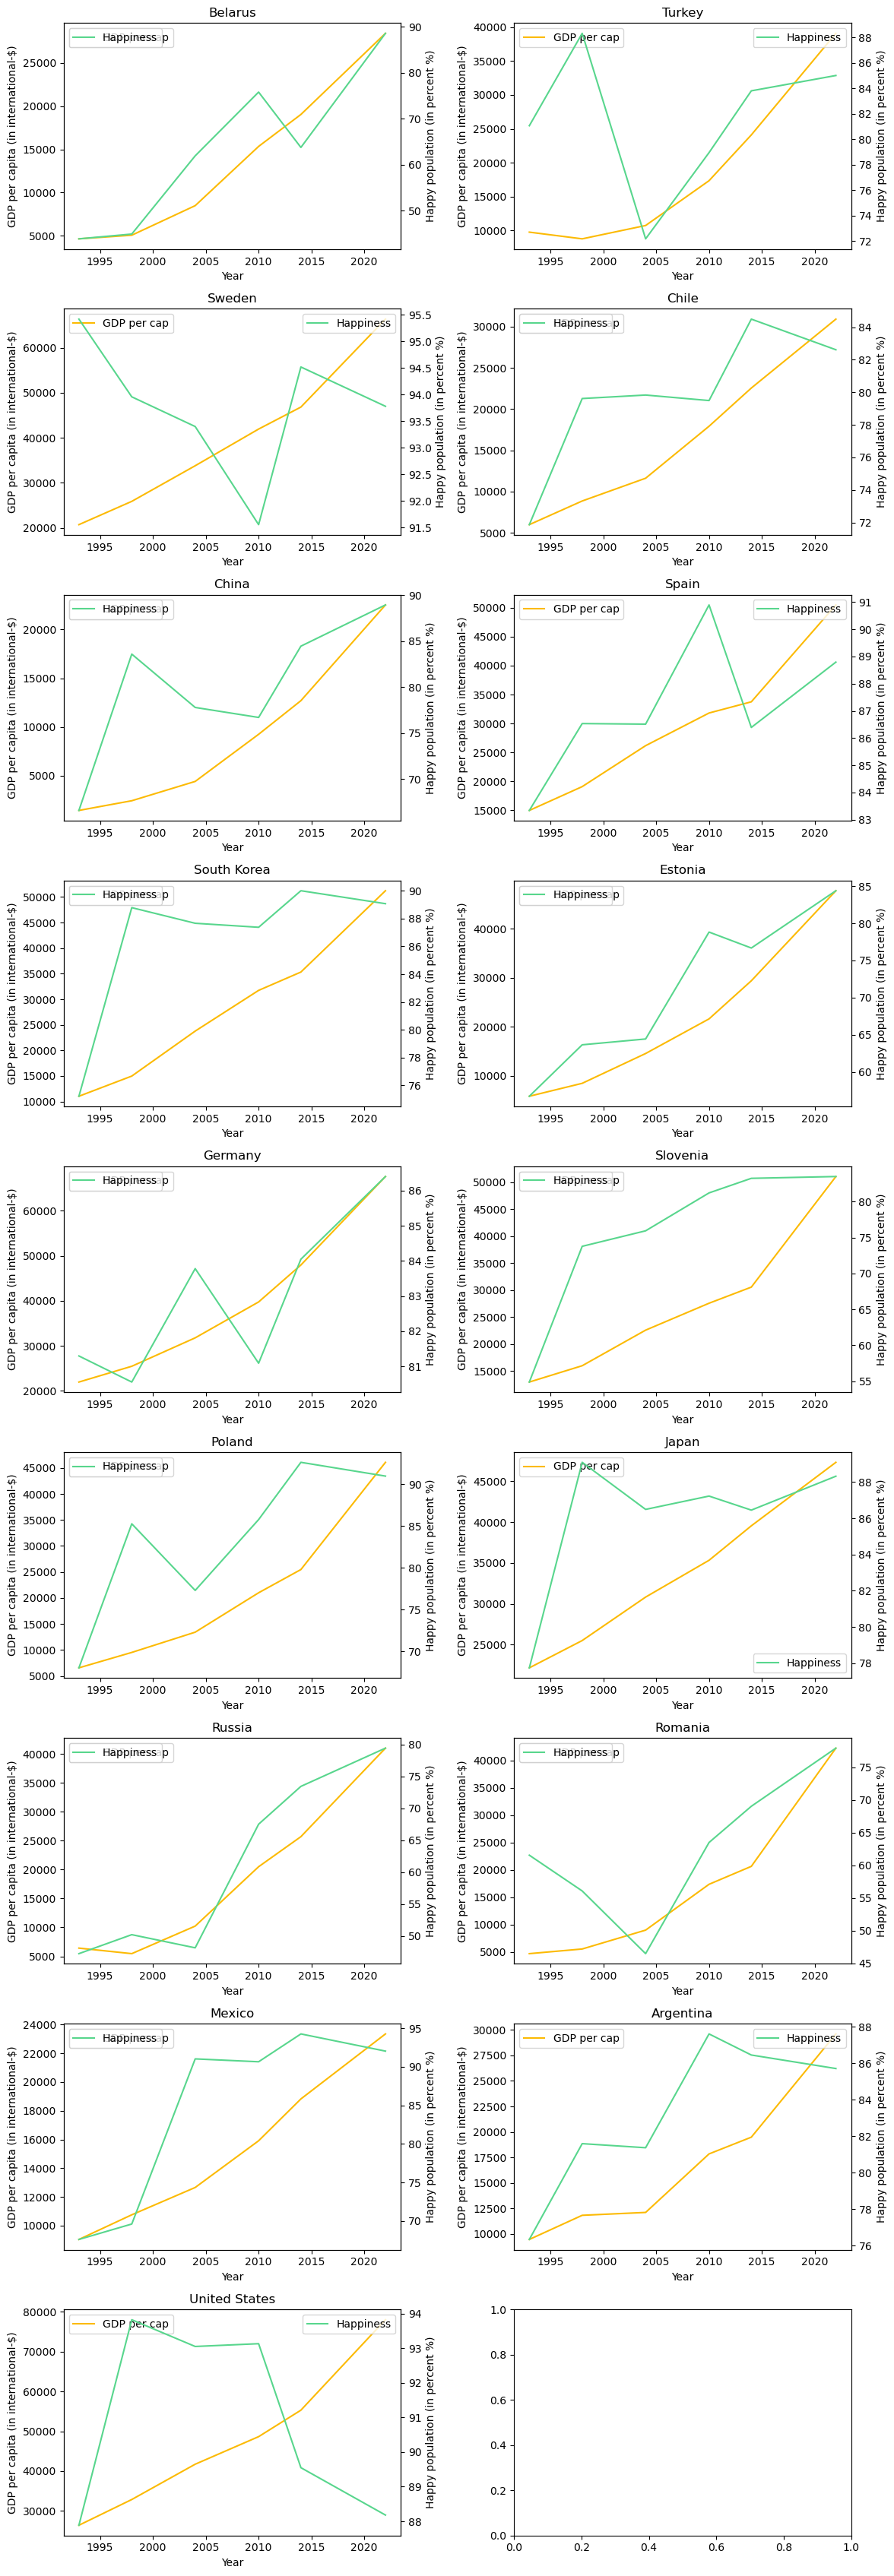

In [53]:
import matplotlib.pyplot as plt

countries = gdppercap_vs_happiness_final['Country Name'].unique()

gdppercap_vs_happiness_plot = gdppercap_vs_happiness_final.rename(columns={'Happiness' : 'Happy population (in percent %)'})

fig, axes = plt.subplots(
    nrows= 9,
    ncols= 2,
    figsize=(12, 34)
)

axes = axes.flatten()

for i, country in enumerate(countries):
    country_data = gdppercap_vs_happiness_plot[gdppercap_vs_happiness_plot['Country Name'] == country]
    
    so.lineplot(data=country_data, x='Year', y='GDPpercap', ax=axes[i], color='#fcba03', label=f'GDP per cap')
    axes[i].set_title(f'{country}')
    axes[i].set_ylabel('GDP per capita (in international-$)')

    so.lineplot(data=country_data, x='Year', y='Happy population (in percent %)', ax=axes[i].twinx(), color='#58d68d', label=f'Happiness')
    
plt.tight_layout()
plt.show()
